# Multivariate Geochemical classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d saurabhshahane/multivariate-geochemical-classification

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/multivariate-geochemical-classification
License(s): Attribution 4.0 International (CC BY 4.0)
100%|███████████████████████████████████████| 42.9k/42.9k [00:00<00:00, 180kB/s]
100%|███████████████████████████████████████| 42.9k/42.9k [00:00<00:00, 180kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Multivariate Geochemical classification/multivariate-geochemical-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Multivariate Geochemical classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('DataSet_Thaba_Classification.csv', sep=';')

In [7]:
df.head()

,ProjectCode,BH_ID,Motherhole,HoleType,MaxDepth,DepthFrom,DepthTo,Date,Cr2O3_%,FeO_%,...,CaO_%,P_%,Au_ICP_ppm,Pt_ICP_ppm,Pd_ICP_ppm,Rh_ICP_ppm,Ir_ICP_ppm,Ru_ICP_ppm,Stratigraphy,Filter
0,J1103,SC06,SC06,borehole,639.35,619.33,619.36,23. Dez 08,34.96,19.29,...,0.89,0.00,0.01,0.53,0.16,0.14,0.09,0.32,LG1,0
1,J1098,SC11,SC11,borehole,460.20,397.47,397.53,23. Feb 09,39.64,20.77,...,0.46,0.01,0.01,1.56,0.60,0.42,0.13,0.38,LG2,0
2,J1492,MD16,MD16,borehole,278.80,151.53,151.69,17. Sep 13,46.28,20.81,...,0.80,0.00,0.01,0.04,0.02,0.10,0.04,0.26,LG3,0
3,J1474,MD09,MD09,borehole,52.23,48.38,48.78,09. Nov 09,39.53,19.65,...,2.20,0.01,0.01,0.10,0.02,0.07,0.04,0.34,LG4,0
4,J1097,SC63,SC63,borehole,333.75,330.35,330.59,23. Feb 09,43.11,23.51,...,0.43,0.00,0.01,0.55,0.19,0.21,0.08,0.47,LG5,0


In [8]:
df.shape

(1205, 23)

In [10]:
df.size

27715

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProjectCode   1205 non-null   object 
 1   BH_ID         1205 non-null   object 
 2   Motherhole    1205 non-null   object 
 3   HoleType      1205 non-null   object 
 4   MaxDepth      1205 non-null   float64
 5   DepthFrom     1205 non-null   float64
 6   DepthTo       1205 non-null   float64
 7   Date          1205 non-null   object 
 8   Cr2O3_%       1126 non-null   float64
 9   FeO_%         1125 non-null   float64
 10  SiO2_%        1126 non-null   float64
 11  MgO_%         1126 non-null   float64
 12  Al2O3_%       1125 non-null   float64
 13  CaO_%         1126 non-null   float64
 14  P_%           1125 non-null   float64
 15  Au_ICP_ppm    1205 non-null   float64
 16  Pt_ICP_ppm    1205 non-null   float64
 17  Pd_ICP_ppm    1205 non-null   float64
 18  Rh_ICP_ppm    1205 non-null 

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MaxDepth,1205.0,354.993793,206.670294,14.40,189.1400,355.610,541.70,666.04
DepthFrom,1205.0,129.194871,109.254857,2.90,41.4900,102.350,178.03,619.33
DepthTo,1205.0,129.770896,109.329033,3.03,42.0400,103.000,178.61,619.36
Cr2O3_%,1126.0,35.849654,6.045757,0.01,32.3500,35.065,39.98,49.90
FeO_%,1125.0,23.744524,3.061533,0.40,22.7200,23.930,25.11,46.76
SiO2_%,1126.0,9.496661,5.683370,0.15,5.3475,9.495,12.32,56.98
MgO_%,1126.0,10.135275,1.625486,0.17,9.5000,9.940,10.43,23.54
Al2O3_%,1125.0,15.922178,2.031183,0.07,14.6800,16.040,17.40,23.09
CaO_%,1126.0,1.705746,1.273920,0.03,0.8100,1.660,2.22,14.64
P_%,1125.0,0.002907,0.047248,0.00,0.0000,0.000,0.00,1.57


In [13]:
df.isnull().sum()

ProjectCode      0
BH_ID            0
Motherhole       0
HoleType         0
MaxDepth         0
DepthFrom        0
DepthTo          0
Date             0
Cr2O3_%         79
FeO_%           80
SiO2_%          79
MgO_%           79
Al2O3_%         80
CaO_%           79
P_%             80
Au_ICP_ppm       0
Pt_ICP_ppm       0
Pd_ICP_ppm       0
Rh_ICP_ppm       0
Ir_ICP_ppm       0
Ru_ICP_ppm       0
Stratigraphy     0
Filter           0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.nunique()

ProjectCode      124
BH_ID            317
Motherhole       218
HoleType           2
MaxDepth         291
DepthFrom       1153
DepthTo         1128
Date              22
Cr2O3_%          832
FeO_%            580
SiO2_%           795
MgO_%            379
Al2O3_%          532
CaO_%            348
P_%                8
Au_ICP_ppm         7
Pt_ICP_ppm       251
Pd_ICP_ppm       118
Rh_ICP_ppm        72
Ir_ICP_ppm        32
Ru_ICP_ppm        97
Stratigraphy      15
Filter             2
dtype: int64

In [16]:
df['Filter'].value_counts()

Filter
1    1193
0      12
Name: count, dtype: int64

## Data Visualization

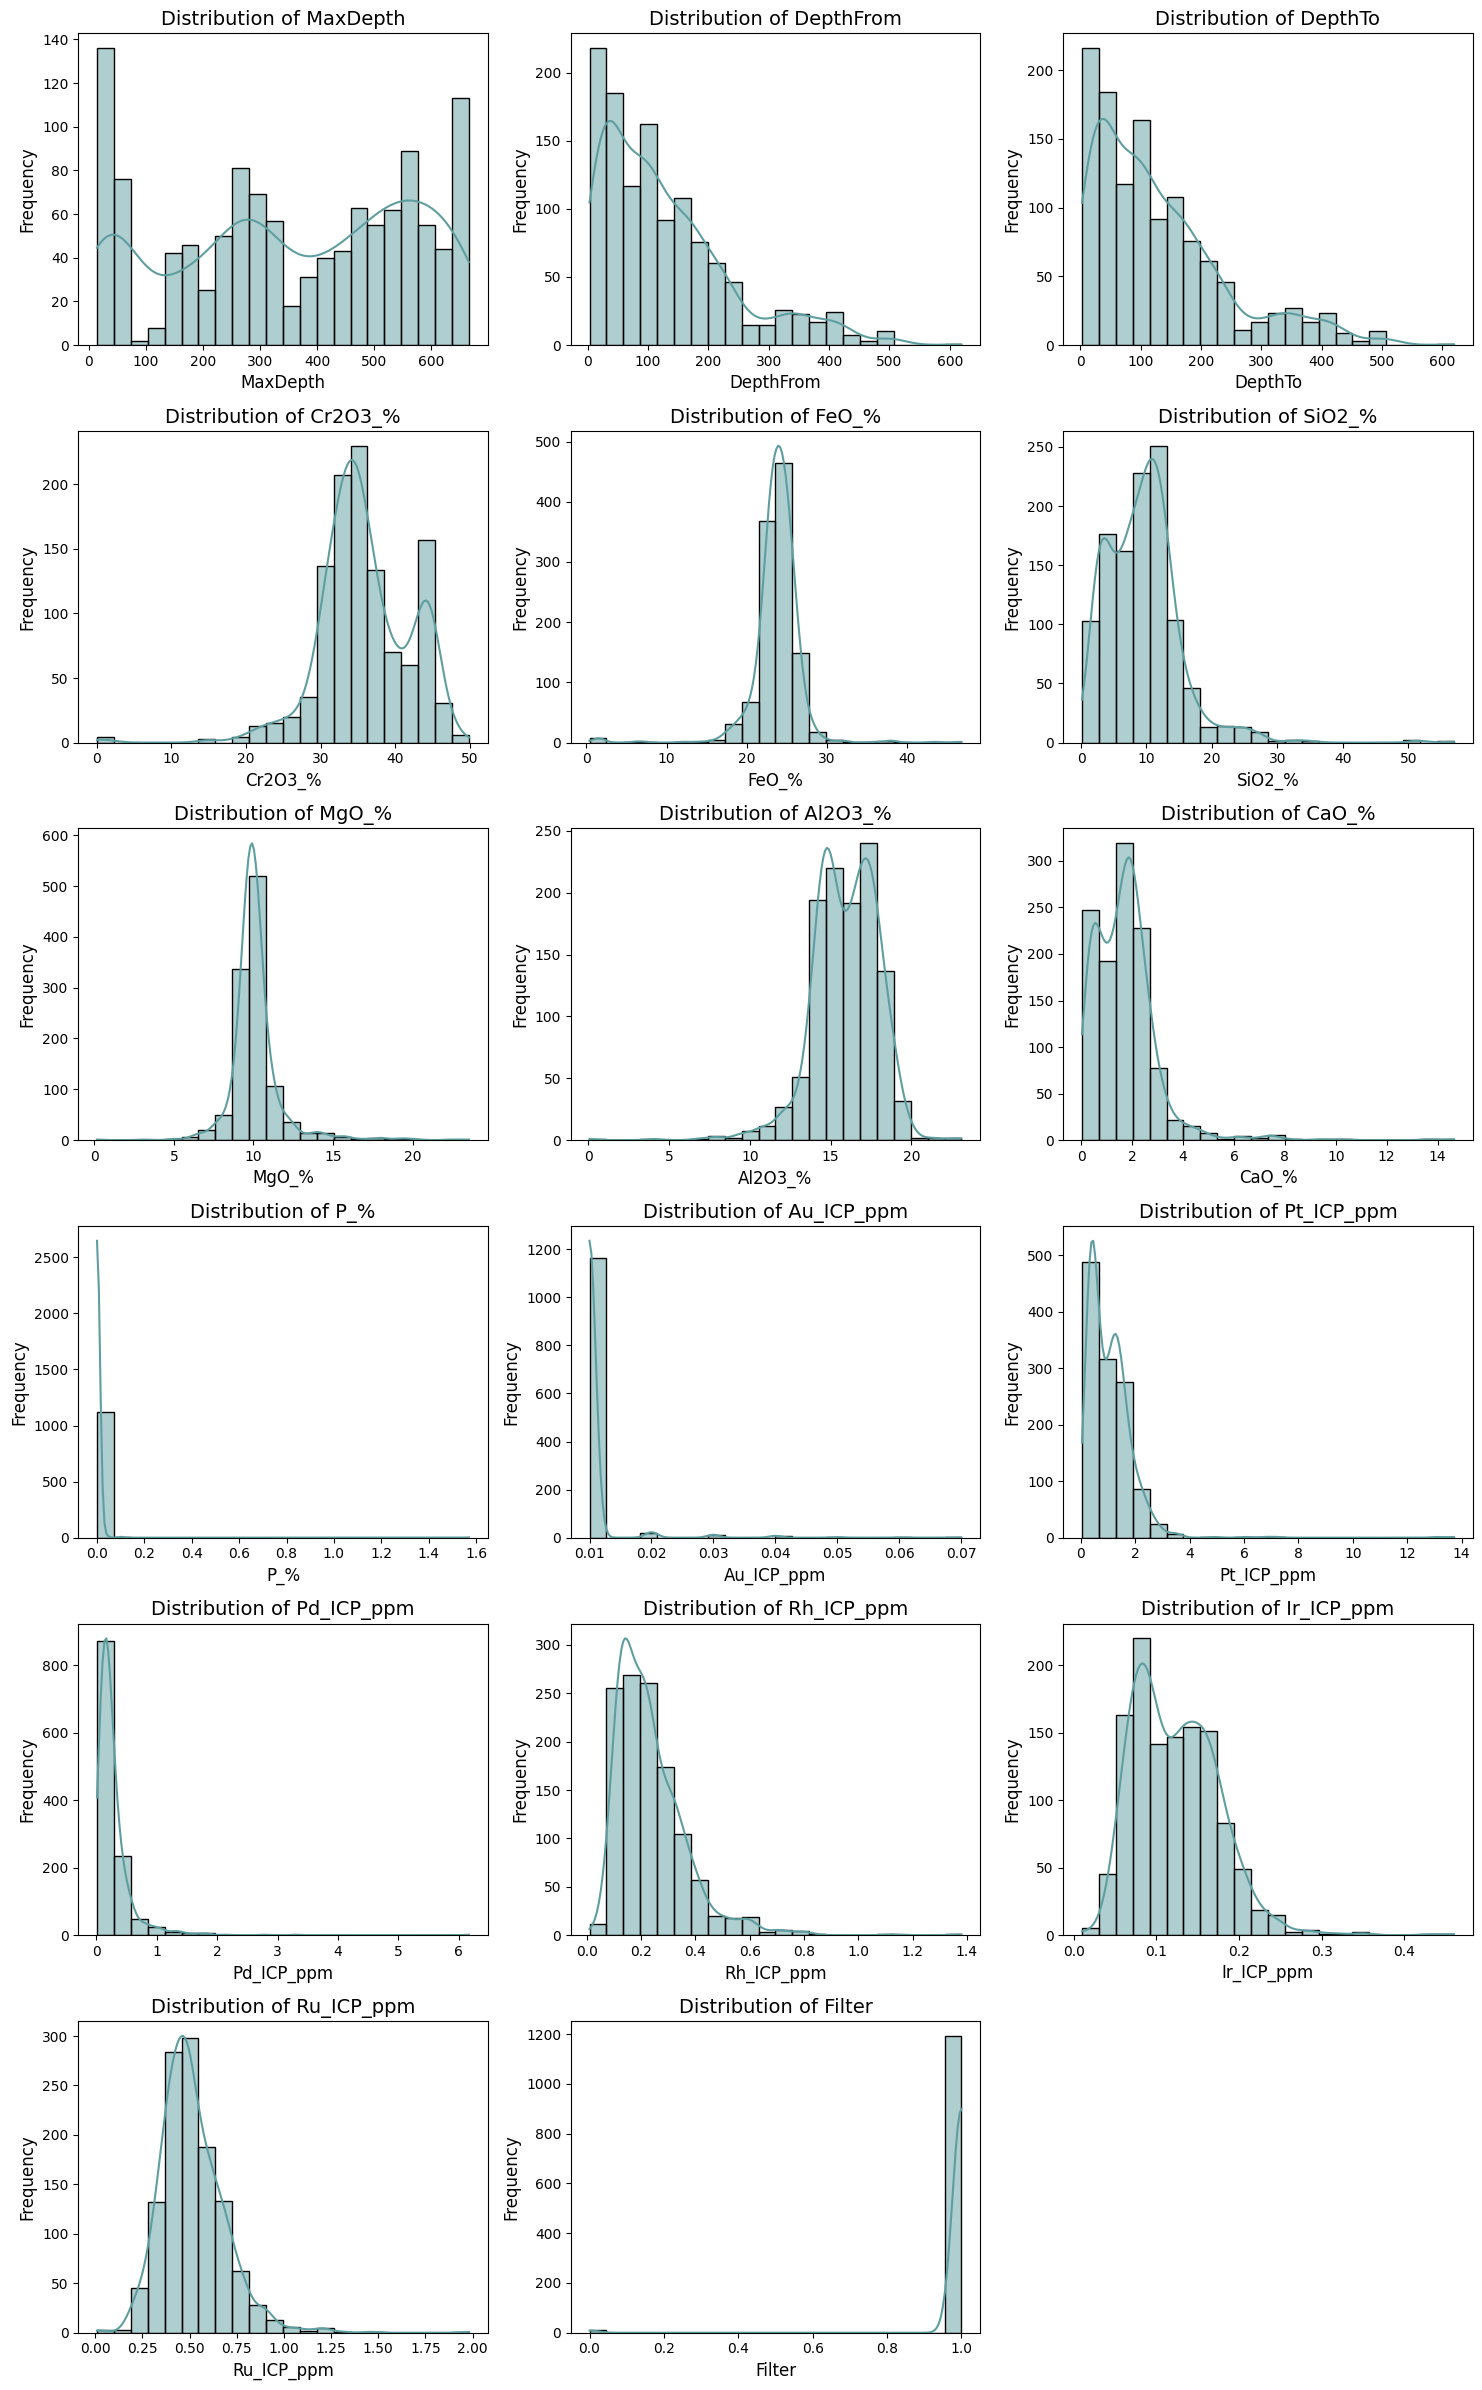

In [18]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

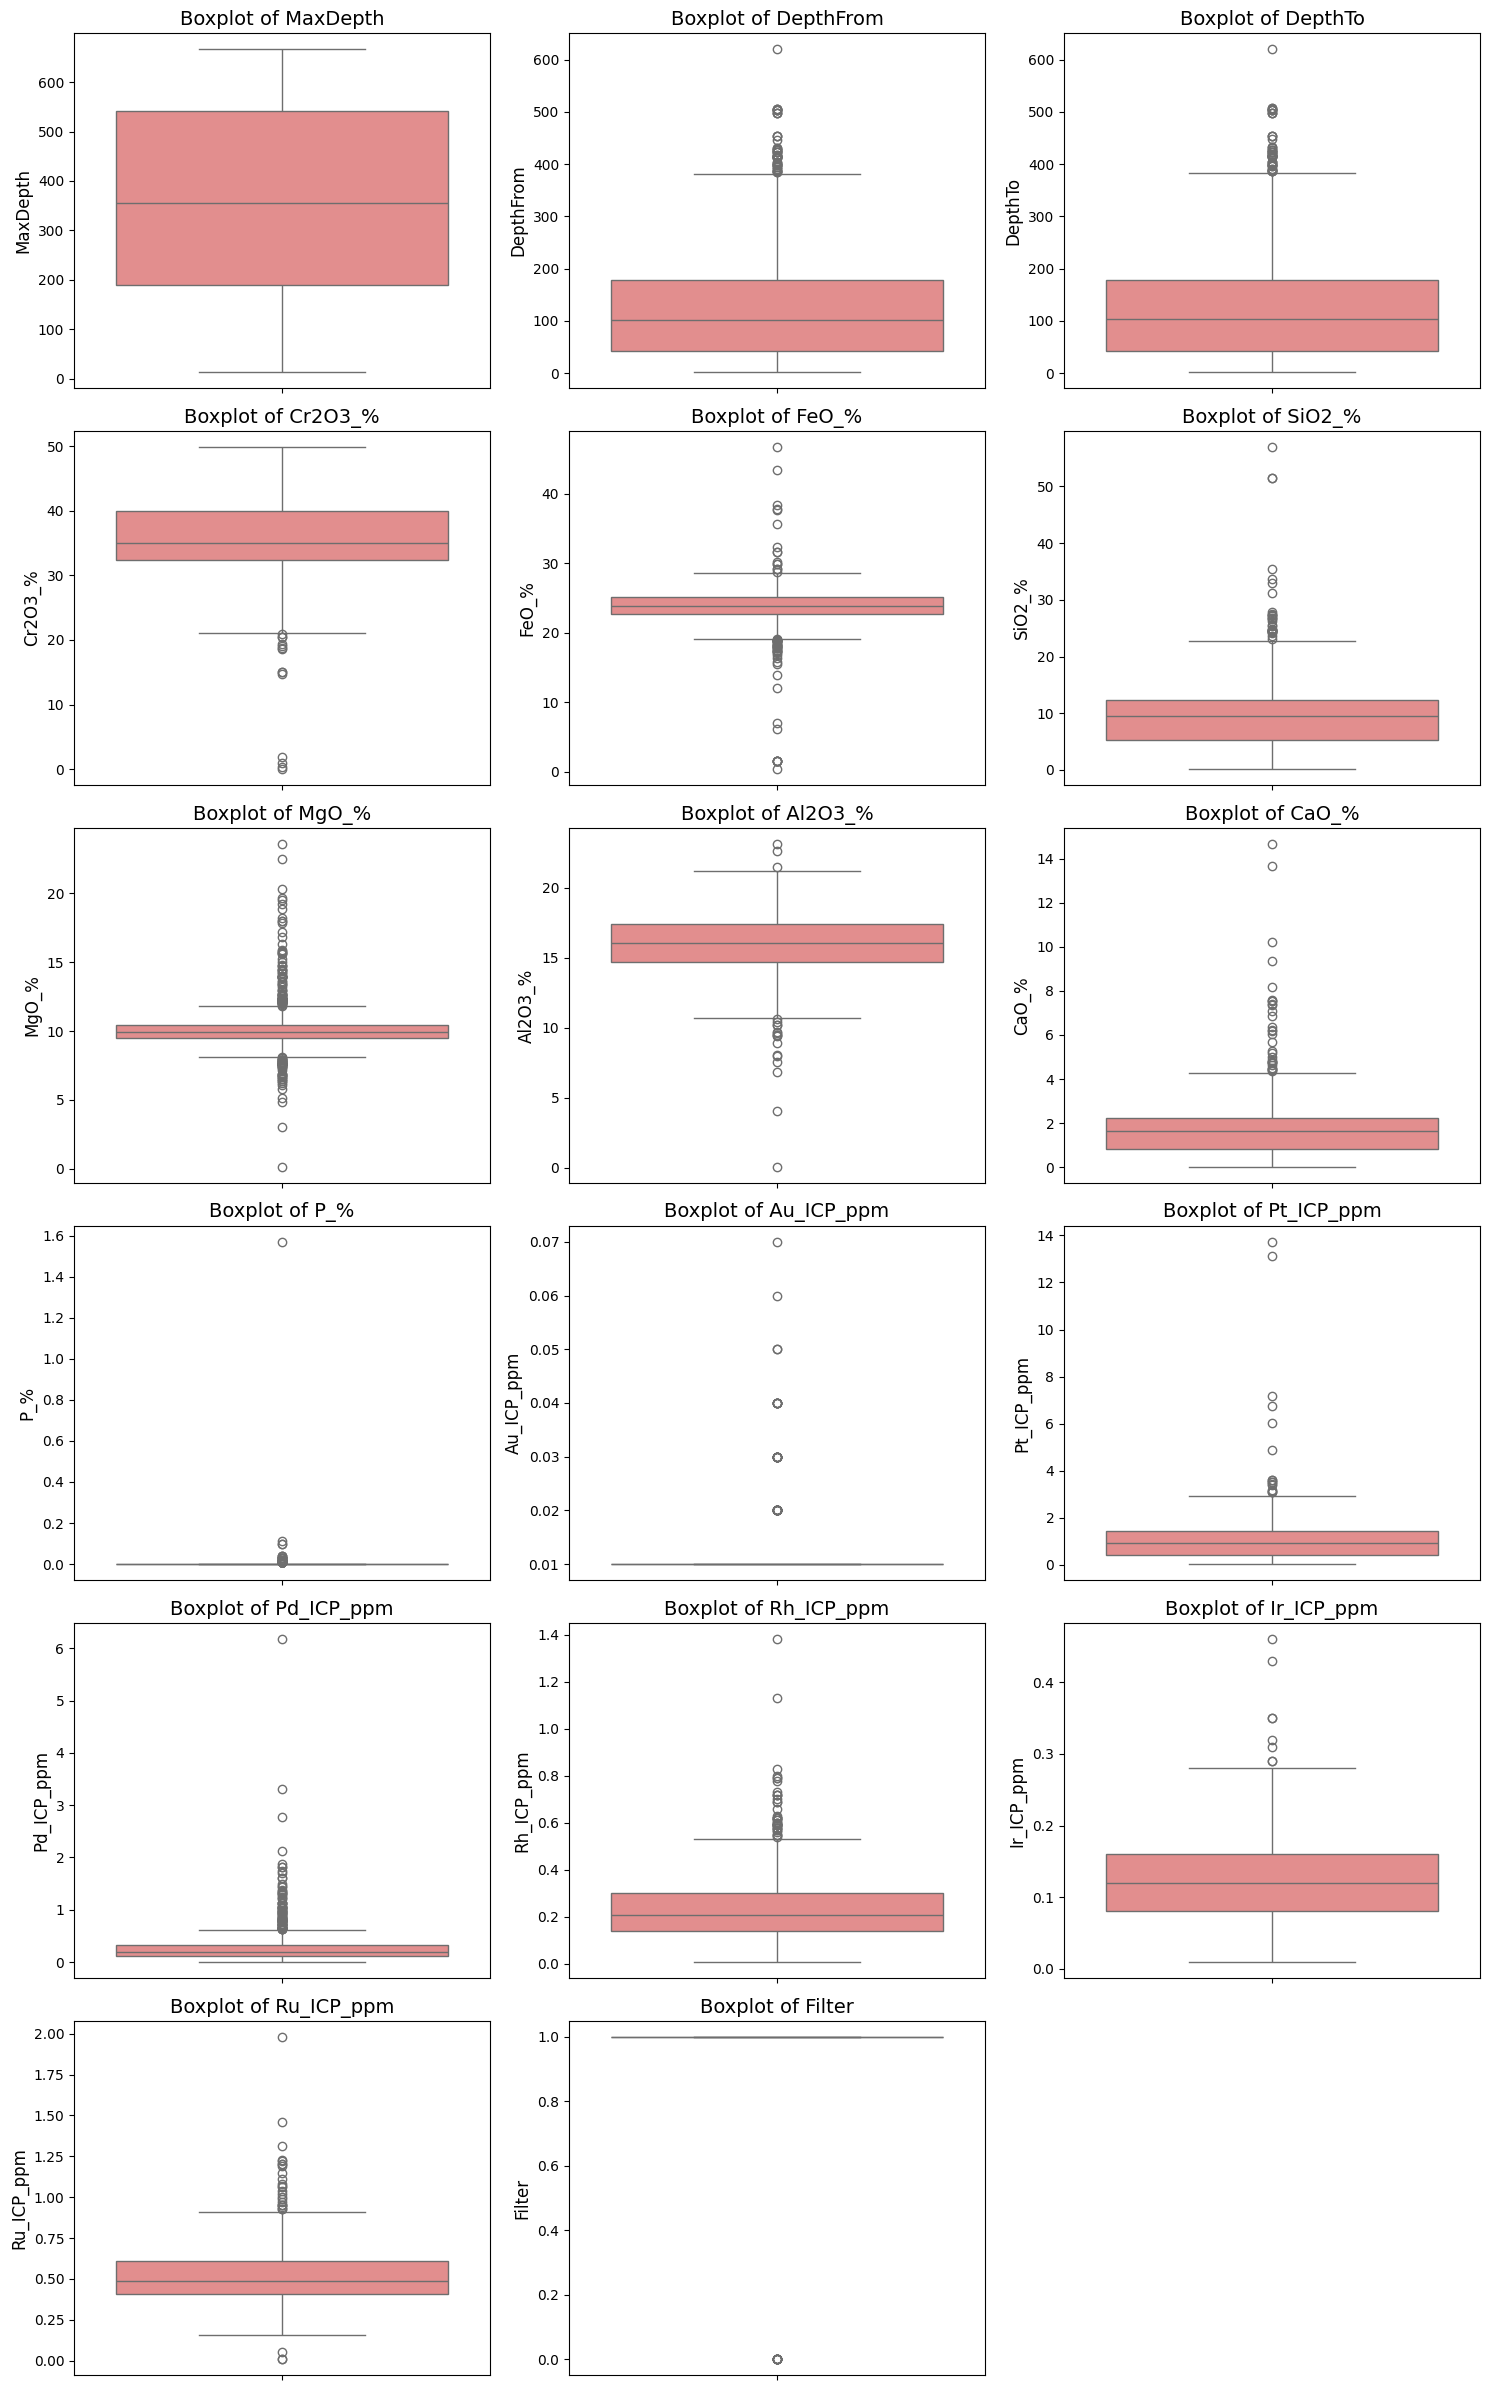

In [19]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

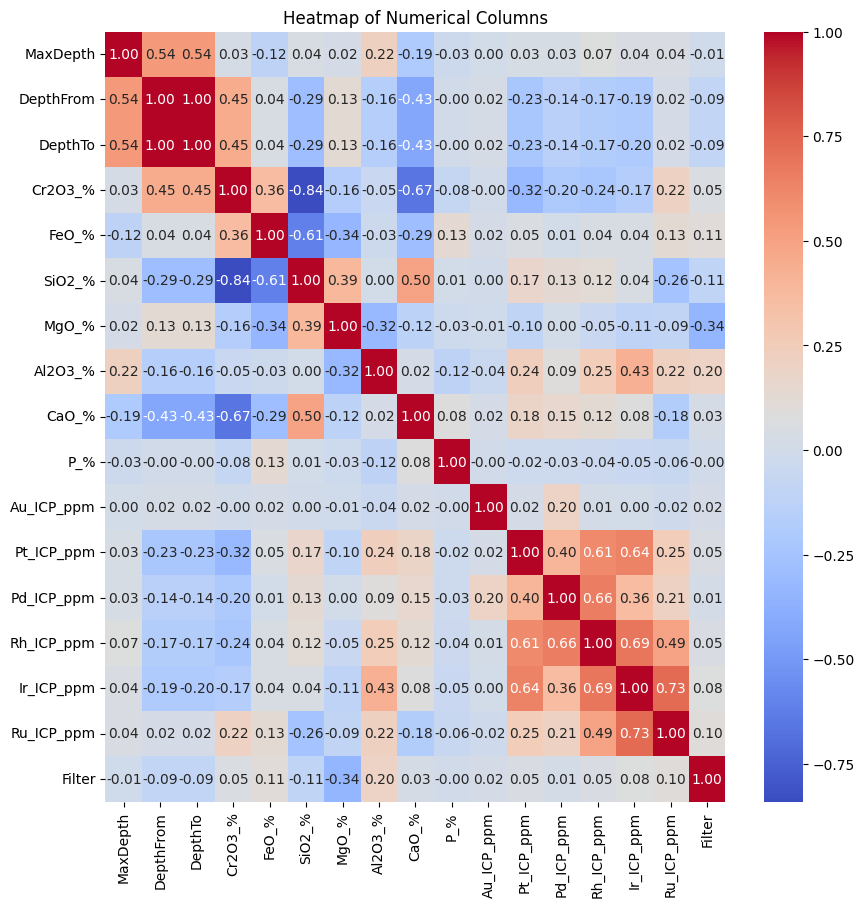

In [20]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [21]:
# Dropping null values

df.dropna(inplace=True)

In [24]:
# Dropping column with higher heatmap value

df.drop(columns=['DepthTo'], inplace=True)

In [25]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [26]:
X = df.drop(columns=['Filter'])
y = df['Filter']

In [27]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [28]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Evaluation

In [29]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [32]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.9955056179775281, 0.9685393258426966, 1.0, 1.0, 1.0, 1.0, 0.9977528089887641, 0.9977528089887641, 1.0]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       213
           1       1.00      0.99      1.00       232

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

Confusion Matrix:
 [[213   0]
 [  2 230]]


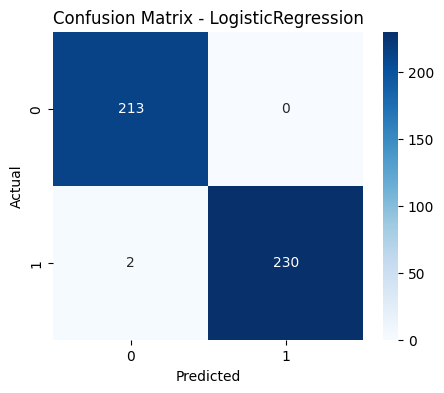

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       213
           1       1.00      0.94      0.97       232

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445

Confusion Matrix:
 [[213   0]
 [ 14 218]]


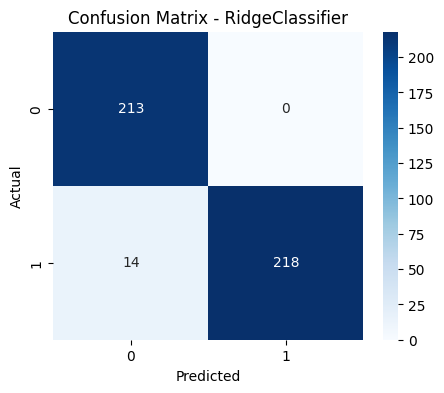

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       232

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

Confusion Matrix:
 [[213   0]
 [  0 232]]


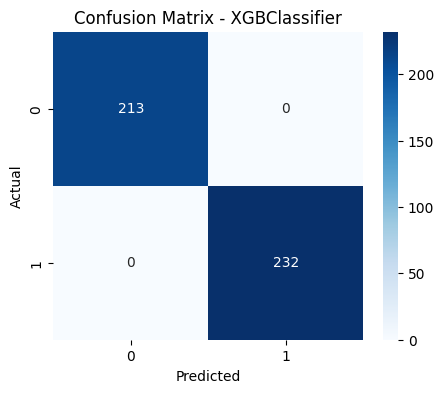

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       232

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

Confusion Matrix:
 [[213   0]
 [  0 232]]


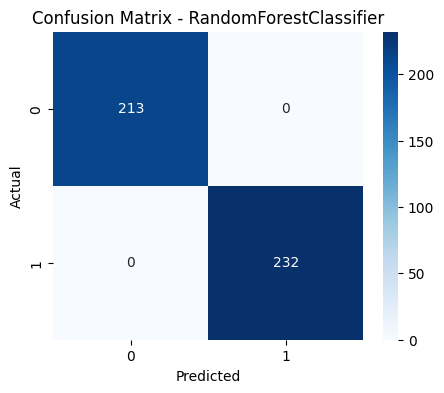

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       232

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

Confusion Matrix:
 [[213   0]
 [  0 232]]


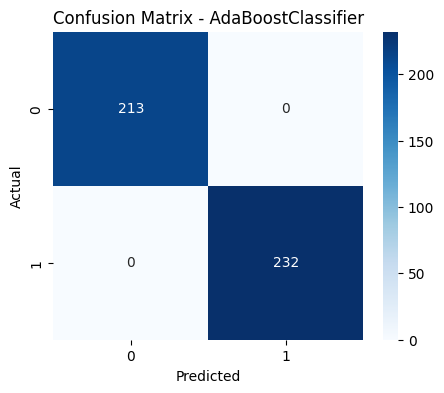

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       232

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

Confusion Matrix:
 [[213   0]
 [  0 232]]


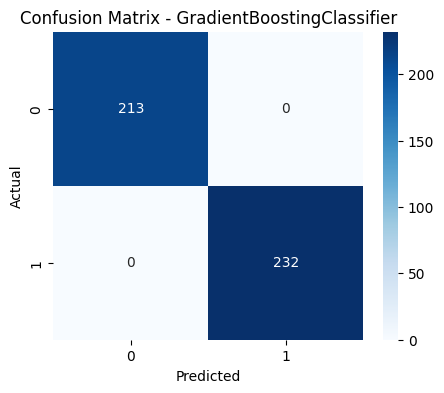

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       232

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

Confusion Matrix:
 [[213   0]
 [  0 232]]


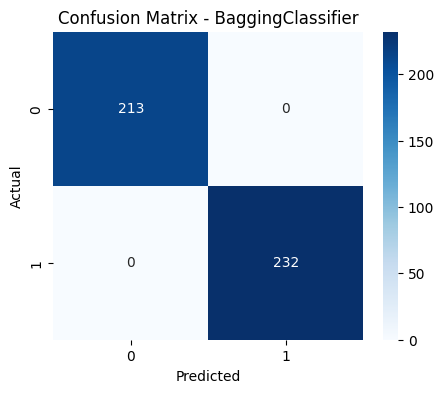

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       232

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

Confusion Matrix:
 [[213   0]
 [  1 231]]


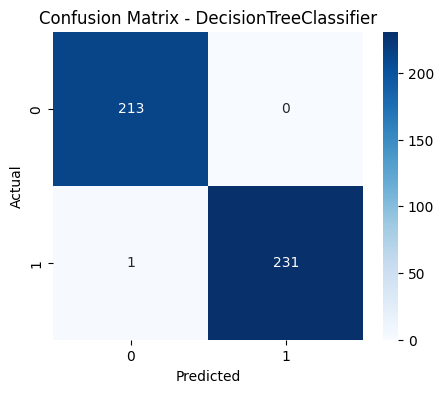

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       232

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

Confusion Matrix:
 [[213   0]
 [  0 232]]


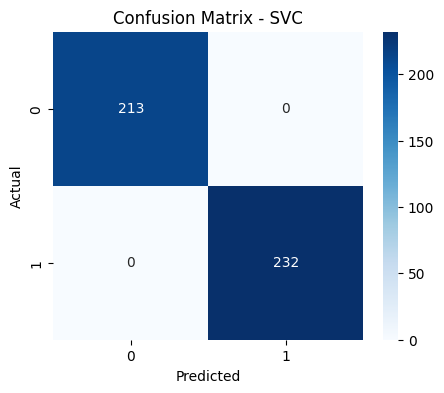

In [33]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()